In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

from miniml.ann import *
from miniml.helper import *

## Classification

**dataset 1**

In [2]:
X_, y_ = [], []
with open('./datasets/synthetic1_train.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        p1, p2, label = row[0].split(',')
        p1, p2, label = float(p1), float(p2), int(label)-1
        X_.append([p1, p2])
        y_.append(label)
X_, y_ = np.array(X_), np.array(y_)

# one hot
c = len(np.unique(y_))
b = np.zeros((y_.size, c))
b[np.arange(y_.size), y_] = 1
y_ = np.copy(b)

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

In [3]:
ann = ANN(X_, y_, 'classifier')
param = ann.fit(hidden_layer=[10, 4], lr=1e-1, epochs=2000, batch_size=8, verbose=False)

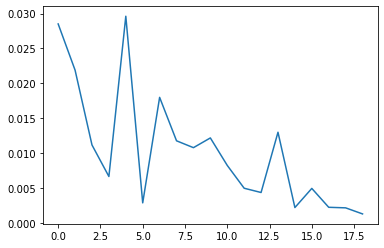

In [4]:
losses = param[-1]
_ = plt.plot(losses[1:])

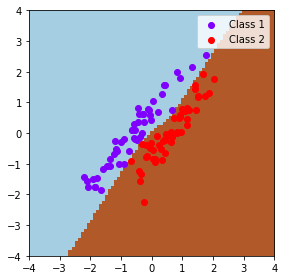

In [5]:
plotBoundByDecisionFunction(ann.x_val, np.argmax(ann.y_val, axis=1), ann.predict)

**dataset 2**

In [6]:
_file_data = np.loadtxt('./spiral.csv', delimiter=';', dtype=np.float32)

X_ = _file_data[:,0:2]
y_ = np.array(list(map(int, _file_data[:,2])))

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

# one hot
c = len(np.unique(y_))
b = np.zeros((y_.size, c))
b[np.arange(y_.size), y_] = 1
y_ = np.copy(b)

In [7]:
ann = ANN(X_, y_, 'classifier')
param = ann.fit(hidden_layer=[50, 10], lr=1e-1, epochs=2000, batch_size=16, verbose=False)

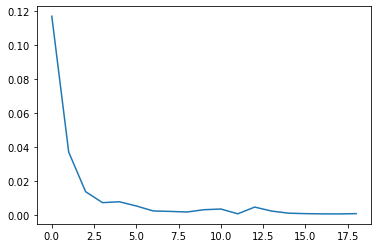

In [8]:
losses = param[-1]
_ = plt.plot(losses[1:])

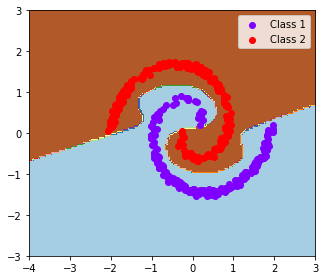

In [9]:
plotBoundByDecisionFunction(ann.x_val, np.argmax(ann.y_val, axis=1), ann.predict, inc=0.05)

## Regression

**1-dim**

In [10]:
X_ = np.array([[i] for i in np.arange(1, 10, 0.2)])
y_ = np.array([np.sin(x)+random.uniform(-0.2, 0.2) for x in X_])

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

In [11]:
ann = ANN(X_, y_, 'regressor')
param = ann.fit(hidden_layer=[10, 4], lr=1e-1, epochs=2000, batch_size=16, verbose=False)

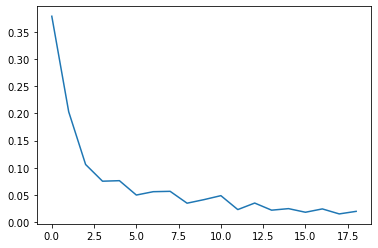

In [12]:
losses = param[-1]
_ = plt.plot(losses[1:])

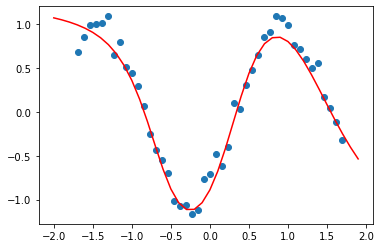

In [13]:
x = np.arange(int(X_.min())-1, int(X_.max())+1, 0.1).reshape(-1,1)

plt.scatter(X_, y_)
_ = plt.plot(x, ann.predict(x).reshape(-1,1), color='r')

**2-dim**

In [14]:
X_ = np.array([[i, j] for i in np.arange(-1, 1, 0.1) for j in np.arange(-1, 1, 0.1)])
y_ = np.array([np.exp(-1 * abs(x*y)) for x, y in X_]).reshape(-1,1)

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

In [15]:
ann = ANN(X_, y_, 'regressor')
param = ann.fit(hidden_layer=[20, 5], lr=1e-1, epochs=2000, batch_size=16, verbose=False)

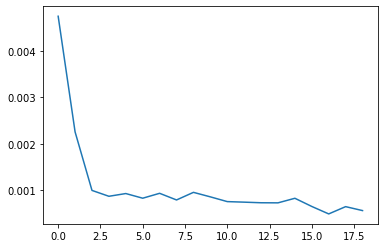

In [16]:
losses = param[-1]
_ = plt.plot(losses[1:])

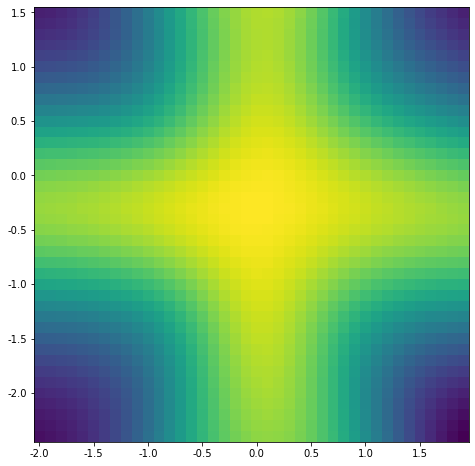

In [17]:
xmin, xmax = int(X_[:,0].min())-1, int(X_[:,0].max())+1
ymin, ymax = int(X_[:,1].min())-1, int(X_[:,1].max())+1
inc = 0.1

plt.figure(figsize=(8, 8))

(x, y) = np.meshgrid(np.arange(xmin, xmax, inc), np.arange(ymin, ymax, inc))
xy = np.hstack((x.reshape(x.shape[0]*x.shape[1], 1, order='F'), 
                y.reshape(y.shape[0]*y.shape[1], 1, order='F')))

len_x = int((xmax-xmin)/inc)
len_y = int((ymax-ymin)/inc)

plt.xticks(np.arange(0, len_x, 5), map(lambda x: round(x,1), np.arange(xmin, xmax, inc*5)))
plt.yticks(np.arange(0, len_y, 5)[::-1], map(lambda x: round(x,1), np.arange(ymin, ymax, inc*5)))
_ = plt.imshow(np.rot90(ann.predict(xy).reshape(len_x, len_y)))